In [38]:
#Imports.
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score
from joblib import dump, load
import matplotlib.pyplot as plt
import datetime as dt

In [17]:
#Takes UKDALE Mains CSV and reads as a pandas Dataframe.
DW = read_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\Load Profile Data\UK_R_h1-5_DW_july_2014.csv', header=[0])
WM = read_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\Load Profile Data\UK_R_h1-5_WM_july_2014.csv', header=[0])
agg = read_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\Load Profile Data\UK_R_h1-5_agg_july_2014.csv', header=[0])


,time,aggregate,dishwasher
0,1.404169e+09,213.0,0.0
1,1.404169e+09,216.0,0.0
2,1.404169e+09,216.0,0.0
3,1.404169e+09,214.0,0.0
4,1.404169e+09,217.0,1.0


In [ ]:
DW.head()

In [18]:
DWdata = DW.values
WMdata = WM.values
aggdata = agg.values

In [19]:
print(DWdata)

[[1.40416920e+09 2.13000000e+02 0.00000000e+00]
 [1.40416921e+09 2.16000000e+02 0.00000000e+00]
 [1.40416921e+09 2.16000000e+02 0.00000000e+00]
 ...
 [1.40684758e+09 1.27000000e+02 0.00000000e+00]
 [1.40684759e+09 1.27000000e+02 0.00000000e+00]
 [1.40684759e+09 1.27000000e+02 0.00000000e+00]]


In [20]:
DWvar, DWdes = DWdata[:,:-1], DWdata[:,-1]
WMvar, WMdes = DWdata[:,:-1], DWdata[:,-1]
aggvar, aggdes = DWdata[:,:-1], DWdata[:,-1]

(1785600, 2) (1785600,)


In [ ]:
print(DWvar.shape, DWdes.shape)
print(WMvar.shape, WMdes.shape)
print(aggvar.shape, aggdes.shape)

In [21]:
DWvar_train, DWvar_test, DWdes_train, DWdes_test = train_test_split(DWvar, DWdes, test_size=0.33, random_state=1)
WMvar_train, WMvar_test, WMdes_train, WMdes_test = train_test_split(WMvar, WMdes, test_size=0.33, random_state=1)
aggvar_train, aggvar_test, aggdes_train, aggdes_test = train_test_split(aggvar, aggdes, test_size=0.33, random_state=1)

(1196352, 2) (589248, 2) (1196352,) (589248,)


In [ ]:
print(DWvar_train.shape, DWvar_test.shape, DWdes_train.shape, DWdes_test.shape)
print(WMvar_train.shape, WMvar_test.shape, WMdes_train.shape, WMdes_test.shape)
print(aggvar_train.shape, aggvar_test.shape, aggdes_train.shape, aggdes_test.shape)

In [22]:
DWmodel = RandomForestRegressor(n_estimators = 75, random_state=1)
DWmodel.fit(DWvar_train, DWdes_train)

RandomForestRegressor(n_estimators=75, random_state=1)

In [ ]:
WMmodel = RandomForestRegressor(n_estimators = 75, random_state=1)
WMmodel.fit(WMvar_train, WMdes_train)

In [ ]:
aggmodel = RandomForestRegressor(n_estimators = 75, random_state=1)
aggmodel.fit(aggvar_train, aggdes_train)

In [23]:
DWyhat = DWmodel.predict(DWvar_test)

In [ ]:
WMyhat = WMmodel.predict(WMvar_test)

In [ ]:
aggyhat = aggmodel.predict(aggvar_test)

In [24]:
#mae = mean_absolute_error(y_test, yhat)
#print('MAE: %.3f' % mae)#

MAE: 3.625


In [30]:
##r2_score(y_test, yhat)

0.8766176527678048

In [59]:
#x_df = pd.DataFrame(X_test)

In [60]:
#x_df[2] = yhat

In [61]:
#x_df.head()

,0,1,2
0,1.406114e+09,346.0,0.842222
1,1.405936e+09,0.0,0.000000
2,1.406377e+09,175.0,0.450741
3,1.405902e+09,552.0,0.000000
4,1.406796e+09,196.0,0.000000


In [62]:
#def from_timestamp(time):
    #t = dt.datetime.fromtimestamp(time)
    #return t

In [63]:
#x_df[0] = x_df[0].apply(from_timestamp)

In [64]:
#x_df.sort_values(by = 0, ascending= True, inplace= True)

In [65]:
#x_df.head()

,0,1,2
519516,2014-07-01 00:00:00,595.0,0.000000
445656,2014-07-01 00:00:00,213.0,0.026667
425369,2014-07-01 00:00:12,216.0,0.565143
449146,2014-07-01 00:00:18,214.0,0.026667
114775,2014-07-01 00:00:24,399.0,5.000000


In [66]:
#x_df = x_df.groupby([0]).mean()

In [82]:
#x_df.head()

,1,2
0,,
2014-07-01 00:00:00,404.0,0.013333
2014-07-01 00:00:12,216.0,0.565143
2014-07-01 00:00:18,214.0,0.026667
2014-07-01 00:00:24,399.0,5.000000
2014-07-01 00:00:30,216.0,0.565143


<Axes: xlabel='0'>

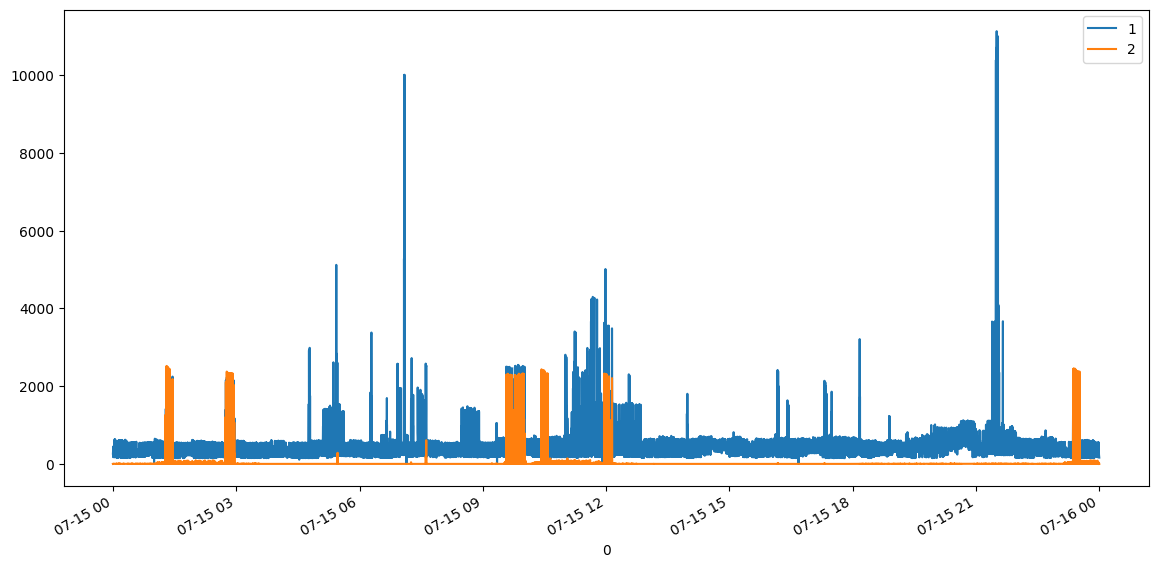

In [86]:
#x_df.loc['2014-07-15 00:00:00':'2014-07-15 23:59:54'].plot(figsize=(14,7))

plt.figure(figsize=(10,10))
plt.scatter(y_test, yhat, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(yhat), max(y_test))
p2 = min(min(yhat), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

residuals = y_test - yhat
plt.scatter(yhat, residuals)
plt.xlabel('Predicted Reactive Measurements')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()